In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 677, in start
    s

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [3]:
# Read the data
data = pd.read_csv(r"./ext_prod.csv")
data.iloc[:10]

,i,noise,initial_noise
0,12,8.114990,0.134521
1,13,4.237793,0.067932
2,14,2.248535,0.034271
3,15,1.141479,0.016998
4,16,0.597656,0.008453
5,17,0.308479,0.004181
6,18,0.157484,0.002165
7,19,0.082006,0.001064
8,20,0.042316,0.000541
9,21,0.021318,0.000262


In [4]:
# initial noise treatment
initial_noise_mean = (data['initial_noise'] * data['i'].apply(lambda x:2**x)).mean() 
N = (2**5) * (3**1) * (5**1)

X = np.arange(12, 21.5, 0.1)
const = 2
Y = const * np.sqrt(N * X) * (initial_noise_mean / (2**X))
X = 2**X

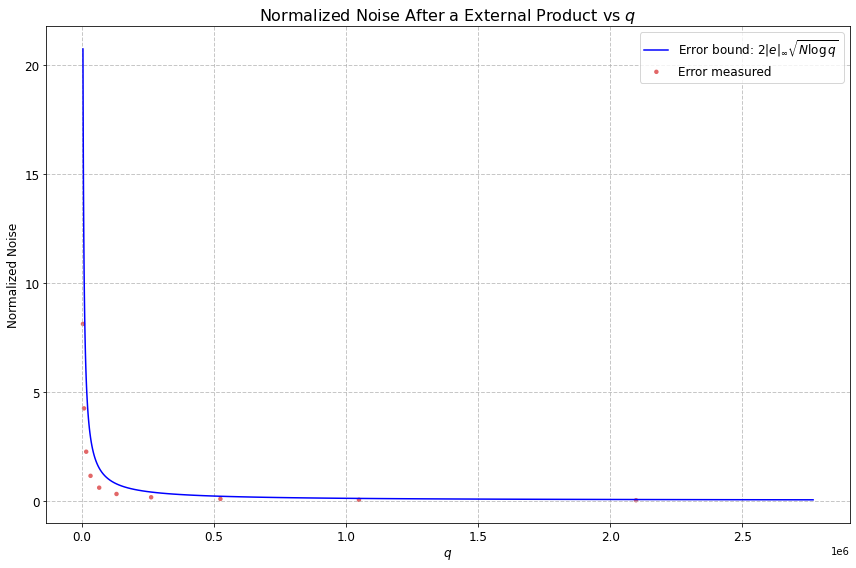

In [7]:
Q = (data['i'].apply(lambda x:2**x))[:10]
noise = (data['noise'])[:10]

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(X, Y, color='blue', label=f'Error bound: {const}'+'$\|e\|_\infty\sqrt{N \log q}$')  
plt.scatter(Q, noise, s=20, color='tab:red', alpha=0.7, edgecolors='none', label='Error measured')

# Log scale for X-axis assuming it's 2**i
plt.xlabel(r'$q$', fontsize=12)
plt.ylabel('Normalized Noise', fontsize=12)

# Title
plt.title('Normalized Noise After a External Product vs $q$', fontsize=16)

# Grid
plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)

# Tweak layout
plt.tight_layout()
plt.savefig("ext_prod.png", dpi=300)
plt.show()

In [3]:
X = [i for i in range(1, 11)]
Y = [675,1662,2107,6716,18375,26000,35528,86413,333199,988424]
plt.scatter(X, Y)

NameError: name 'plt' is not defined